In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('bmh')
import tqdm
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

# Defining additional functions

In [2]:
def readCsvToDF(path):
    dataSeries = pd.read_csv(path)
    dataSeries = dataSeries.rename(columns={'Unnamed: 0': 'Time'})
    TimeIndex = dataSeries['Time']
    dataSeries.index = pd.to_datetime(TimeIndex)
    dataSeries = dataSeries[::-1]
    dataSeries = dataSeries.drop('Time', axis=1)
    return dataSeries

def base_plot(data, x=None):
    # Отрисовка
    plt.figure(figsize=(15,7))
    if x is None:
        plt.plot(data)
    else:
        plt.plot(x, data)
    plt.xlabel('Date')
    plt.ylabel('Values of Time Series')
    plt.grid(True)
    plt.show()

# Loading the DataSet

In [3]:
# testing days = 10
dataSet = readCsvToDF('Data/dataset.csv')
trainData = dataSet[:-24*10]
testingData = dataSet[-24*10:]
dataSet.head()

,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,sensor 9
Time,,,,,,,,,
2019-12-11 10:00:00,541.854431,771.818909,728.981018,707.271729,660.441406,776.562866,0.0,1953.543945,2174.231445
2019-12-11 11:00:00,546.210815,770.051453,728.879578,706.880798,663.398987,772.937256,0.0,1942.814331,2164.085205
2019-12-11 12:00:00,554.211792,770.167908,728.721802,707.779419,665.061401,771.868408,0.0,1968.240601,2188.068848
2019-12-11 13:00:00,552.346313,768.941040,728.868286,708.314941,665.139282,771.105408,0.0,1952.284790,2171.464355
2019-12-11 14:00:00,553.290344,769.628296,729.002502,708.390503,665.938660,770.952454,0.0,1966.600708,2185.202637


In [4]:
trainData.tail()

,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,sensor 9
Time,,,,,,,,,
2020-02-13 13:00:00,591.875488,778.133789,739.075500,711.523193,664.192078,788.663574,0.0,1273.005249,1456.000000
2020-02-13 14:00:00,631.547852,778.042542,739.097046,712.126343,666.627686,786.211426,0.0,1300.730103,1482.370972
2020-02-13 15:00:00,730.494690,777.654236,738.619690,711.982727,666.792542,785.291199,0.0,1284.176880,1466.800537
2020-02-13 16:00:00,677.990662,766.074768,725.911865,714.730286,691.022705,805.785034,0.0,1300.795776,1474.233643
2020-02-13 17:00:00,691.669434,759.720398,720.064758,741.168030,718.074402,809.352600,0.0,1300.931152,1472.976562


In [5]:
testingData.head()

,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,sensor 6,sensor 7,sensor 8,sensor 9
Time,,,,,,,,,
2020-02-13 18:00:00,693.565186,753.938843,717.968079,744.184814,719.488037,808.394958,0.0,1310.022583,1482.543823
2020-02-13 19:00:00,686.927246,752.994629,718.195435,745.405640,719.068726,808.935303,0.0,1329.579468,1502.753418
2020-02-13 20:00:00,702.315918,752.598389,717.811218,745.966553,720.218201,809.542175,0.0,1336.697510,1509.459229
2020-02-13 21:00:00,709.728333,751.664429,717.579224,746.339539,722.227722,810.218384,0.0,1340.889526,1513.969360
2020-02-13 22:00:00,702.291809,751.497986,717.228943,746.017395,721.872803,810.330627,0.0,1344.279785,1517.089722


# Designing models

## Sensor 1

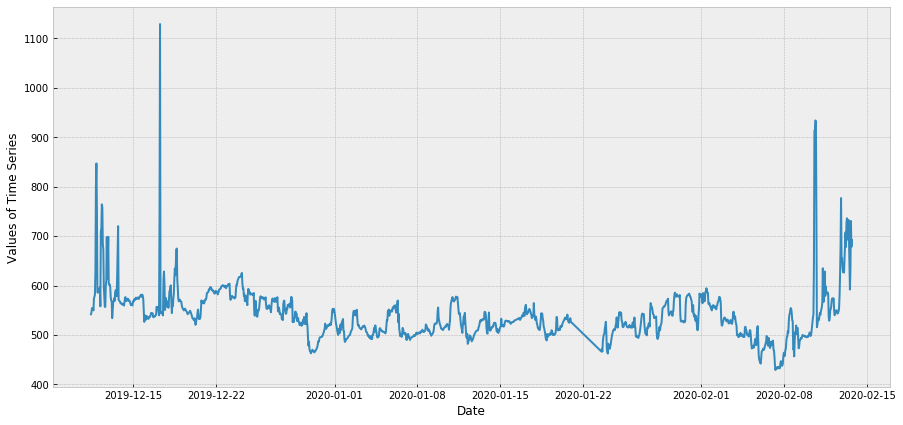

In [6]:
# Загрузка данных
sensor_1 = trainData['sensor 1']
# Отрисовка
base_plot(sensor_1)

### Parametr d

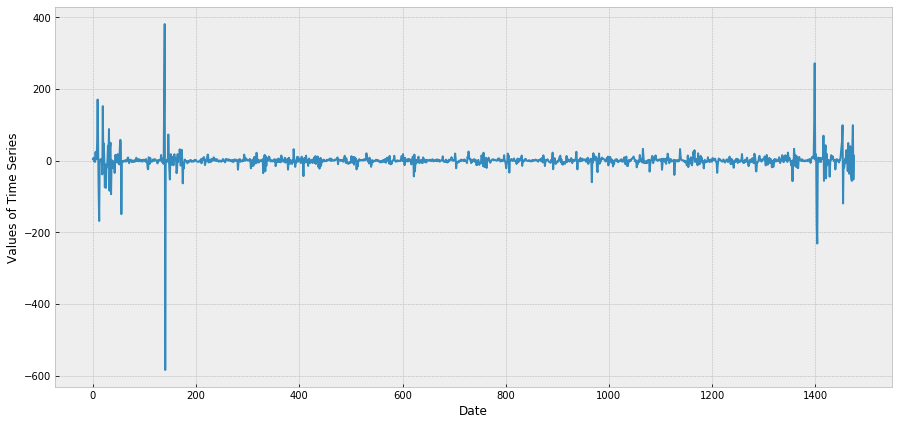

In [7]:
diffSeries = np.diff(sensor_1, 1)
x = np.arange(len(diffSeries))
# Отрисовка графика
base_plot(diffSeries, x)

In [8]:
sm.tsa.stattools.adfuller(diffSeries)

(-12.936372990895434,
 3.610712982015249e-24,
 18,
 1457,
 {'1%': -3.434846127900848,
  '5%': -2.8635257411342616,
  '10%': -2.5678271914441395},
 13394.194430978225)

### Finding p & q parametrs

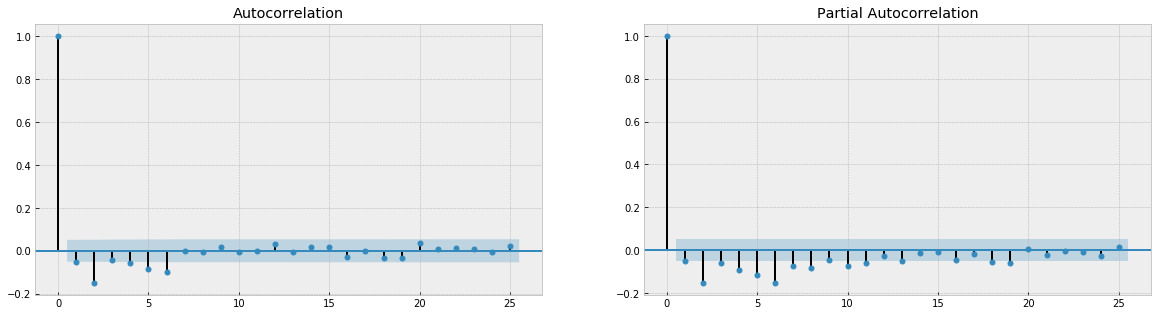

In [9]:
# ACF = q
# PACF = p
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig = sm.graphics.tsa.plot_acf(diffSeries, lags=25, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(diffSeries, lags=25, ax=ax[1])

In [10]:
p_1 = 2 # Наиболее отличен от нуля (Partial Autocorrelation)
q_1 = 2 # Наиболее отличен от нуля (Autocorrelation)
d_1 = 0

In [11]:
model1 = sm.tsa.ARIMA(sensor_1, order=(p_1,d_1,q_1)).fit(full_output=False, disp=0)
print(model1.summary())

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               sensor 1   No. Observations:                 1477
Model:                     ARMA(2, 2)   Log Likelihood               -6871.847
Method:                       css-mle   S.D. of innovations             25.355
Date:                Thu, 07 May 2020   AIC                          13755.693
Time:                        22:38:57   BIC                          13787.480
Sample:                             0   HQIC                         13767.544
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            552.2139     19.079     28.944      0.000     514.820     589.608
ar.L1.sensor 1     1.6530      0.041     40.519      0.000       1.573       1.733
ar.L2.sensor 1    -0.6555      0.040

## Sensor 2

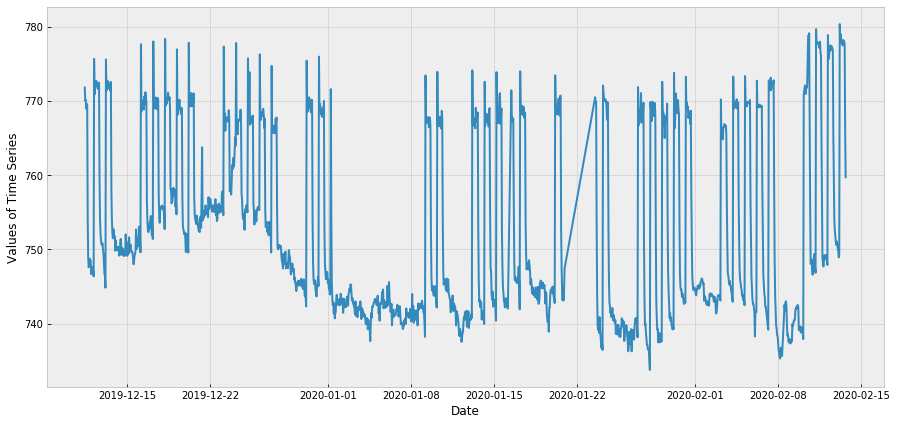

In [12]:
# Загрузка данных
sensor_2 = trainData['sensor 2']
# Отрисовка
base_plot(sensor_2)

### Parametr d

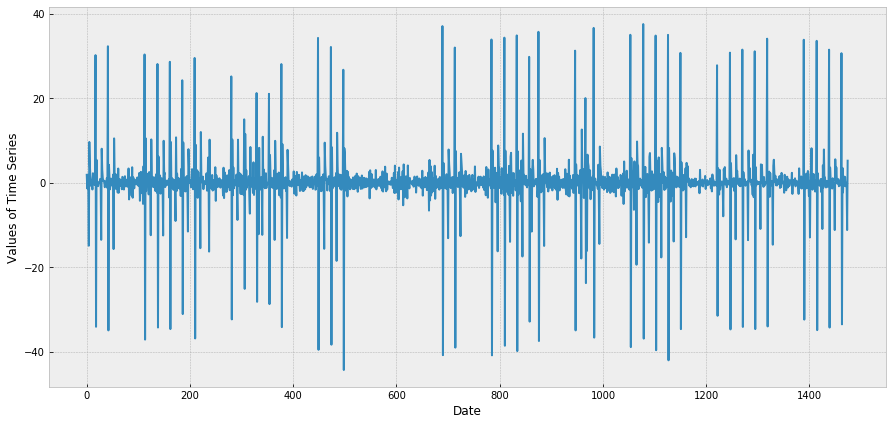

In [13]:
diffSeries2 = np.diff(sensor_2, 2)
x = np.arange(len(diffSeries2))
# Отрисовка
base_plot(diffSeries2, x)

In [14]:
sm.tsa.stattools.adfuller(diffSeries2)

(-20.39514074992113,
 0.0,
 23,
 1451,
 {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 8626.872474488608)

### Finding p & q parametrs

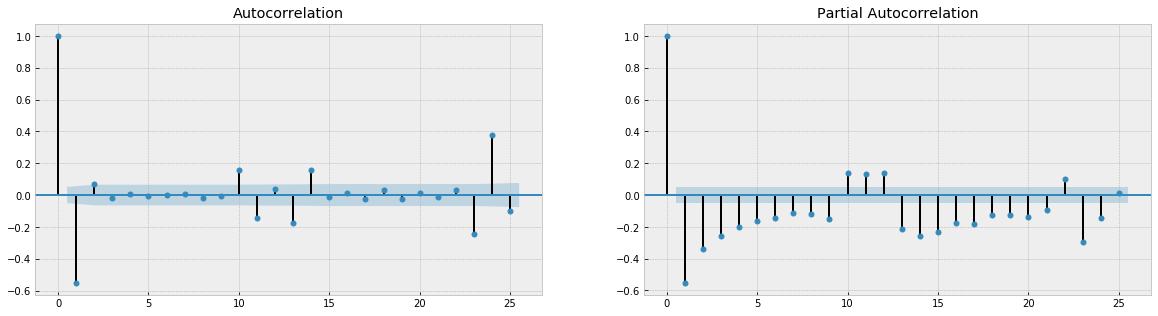

In [15]:
# ACF = q
# PACF = p
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig = sm.graphics.tsa.plot_acf(diffSeries2, lags=25, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(diffSeries2, lags=25, ax=ax[1])

In [16]:
p_2 = 1 # Наиболее отличен от нуля (Partial Autocorrelation)
q_2 = 2 # Наиболее отличен от нуля (Autocorrelation)
d_2 = 0

In [17]:
model2 = sm.tsa.ARIMA(sensor_2, order=(p_2,d_2,q_2)).fit(full_output=False, disp=0)
print(model2.summary())

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               sensor 2   No. Observations:                 1477
Model:                     ARMA(1, 2)   Log Likelihood               -4615.168
Method:                       css-mle   S.D. of innovations              5.503
Date:                Thu, 07 May 2020   AIC                           9240.336
Time:                        22:38:59   BIC                           9266.825
Sample:                             0   HQIC                          9250.212
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            752.8351      1.275    590.419      0.000     750.336     755.334
ar.L1.sensor 2     0.8821      0.015     59.199      0.000       0.853       0.911
ma.L1.sensor 2    -0.0220      0.029

## Sensor 3

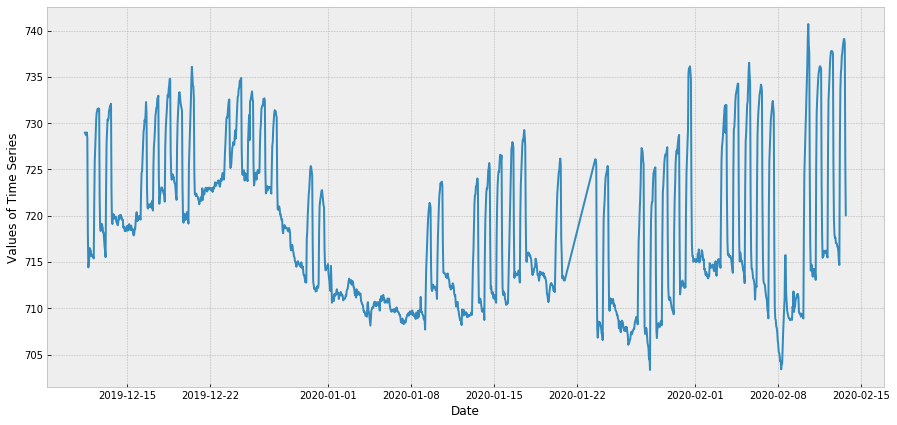

In [18]:
# Загрузка данных
sensor_3 = trainData['sensor 3']
# Отрисовка
base_plot(sensor_3)

### Parametr d

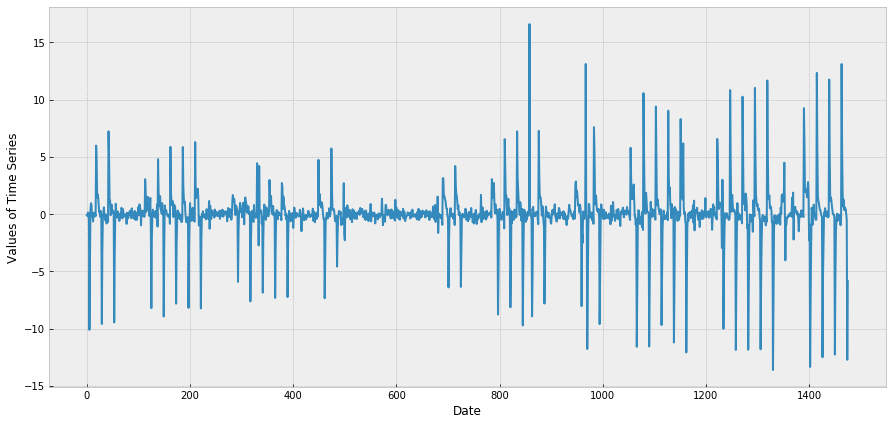

In [19]:
diffSeries3 = np.diff(sensor_3, 0)
x = np.arange(len(diffSeries3))
# Отрисовка
base_plot(diffSeries3, x)

In [20]:
sm.tsa.stattools.adfuller(diffSeries3)

(-9.238641635348612,
 1.6047894130375264e-15,
 24,
 1451,
 {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 5553.197252784641)

### Finding p & q parametrs

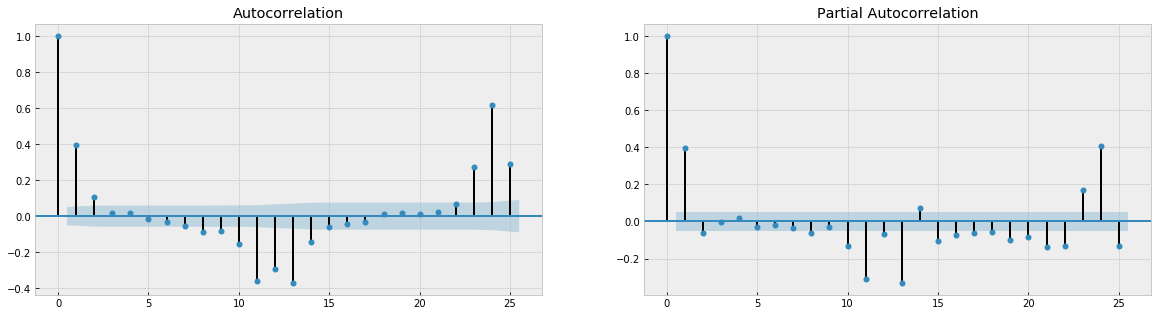

In [21]:
# ACF = q
# PACF = p
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig = sm.graphics.tsa.plot_acf(diffSeries3, lags=25, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(diffSeries3, lags=25, ax=ax[1])

In [22]:
p_3 = 2 # Наиболее отличен от нуля (Partial Autocorrelation)
q_3 = 2 # Наиболее отличен от нуля (Autocorrelation)
d_3 = 0

In [23]:
model3 = sm.tsa.ARIMA(sensor_3, order=(p_3,d_3,q_3)).fit(full_output=False, disp=0)
print(model3.summary())

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               sensor 3   No. Observations:                 1477
Model:                     ARMA(2, 2)   Log Likelihood               -3196.465
Method:                       css-mle   S.D. of innovations              2.105
Date:                Thu, 07 May 2020   AIC                           6404.930
Time:                        22:39:01   BIC                           6436.716
Sample:                             0   HQIC                          6416.780
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            718.1957      0.805    892.026      0.000     716.618     719.774
ar.L1.sensor 3     1.6578      0.064     25.814      0.000       1.532       1.784
ar.L2.sensor 3    -0.6948      0.059

## Sensor 4

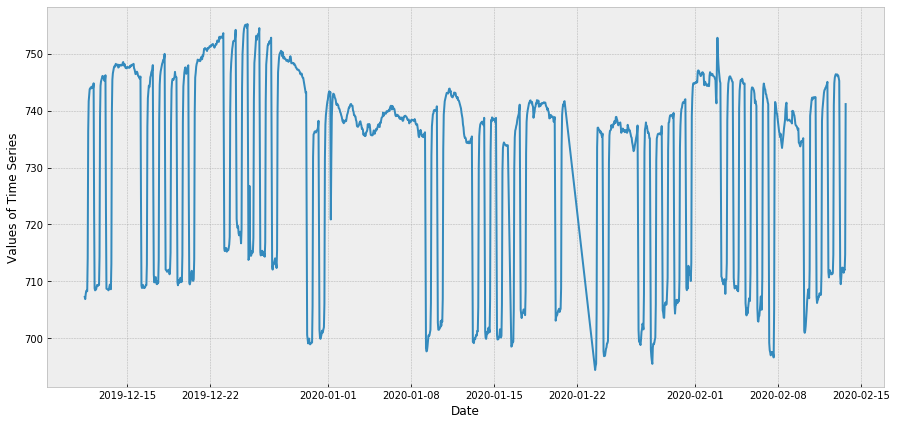

In [24]:
# Загрузка данных
sensor_4 = trainData['sensor 4']
# Отрисовка
base_plot(sensor_4)

### Parametr d

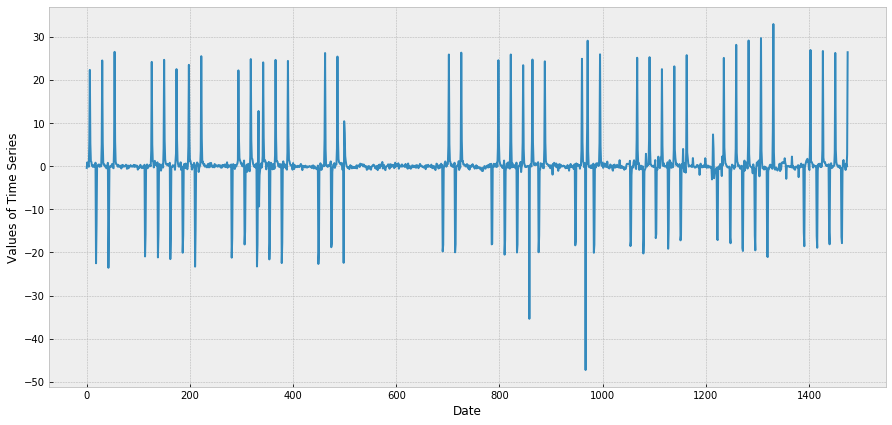

In [25]:
diffSeries4 = np.diff(sensor_4, 1)
x = np.arange(len(diffSeries4))
# Отрисовка
base_plot(diffSeries4, x)

In [26]:
sm.tsa.stattools.adfuller(diffSeries4)

(-11.027977703607043,
 5.763357233276552e-20,
 24,
 1451,
 {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 8338.918833035757)

### Finding p & q parametrs

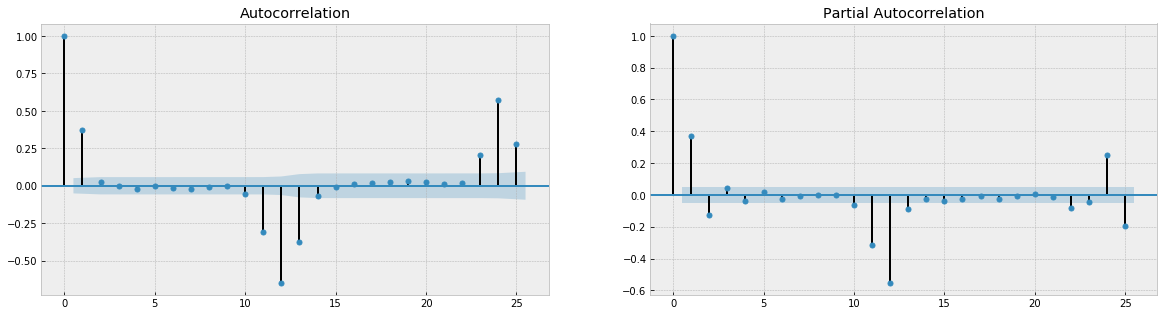

In [27]:
# ACF = q
# PACF = p
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig = sm.graphics.tsa.plot_acf(diffSeries4, lags=25, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(diffSeries4, lags=25, ax=ax[1])

In [28]:
p_4 = 2 # Наиболее отличен от нуля (Partial Autocorrelation)
q_4 = 1 # Наиболее отличен от нуля (Autocorrelation)
d_4 = 0

In [29]:
model4 = sm.tsa.ARIMA(sensor_4, order=(p_4,d_4,q_4)).fit(full_output=False, disp=0)
print(model4.summary())

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               sensor 4   No. Observations:                 1477
Model:                     ARMA(2, 1)   Log Likelihood               -4617.221
Method:                       css-mle   S.D. of innovations              5.509
Date:                Thu, 07 May 2020   AIC                           9244.441
Time:                        22:39:03   BIC                           9270.930
Sample:                             0   HQIC                          9254.317
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            731.5429      1.587    460.999      0.000     728.433     734.653
ar.L1.sensor 4     1.1280      0.069     16.239      0.000       0.992       1.264
ar.L2.sensor 4    -0.2397      0.066

## Sensor 5

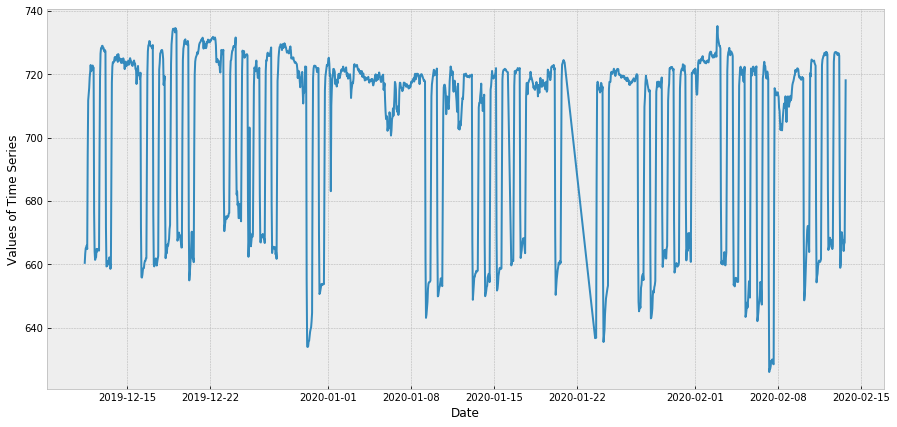

In [30]:
# Загрузка данных
sensor_5 = trainData['sensor 5']
# Отрисовка
base_plot(sensor_5)

### Parametr d

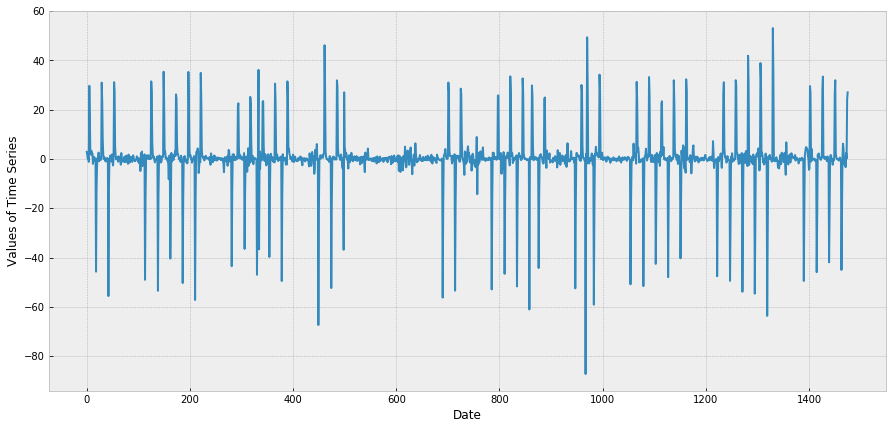

In [31]:
diffSeries5 = np.diff(sensor_5, 1)
x = np.arange(len(diffSeries5))
# Отрисовка
base_plot(diffSeries5, x)

In [32]:
sm.tsa.stattools.adfuller(diffSeries5)

(-11.035761947593816,
 5.522629177582824e-20,
 24,
 1451,
 {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 10388.344895037259)

### Finding p & q parametrs

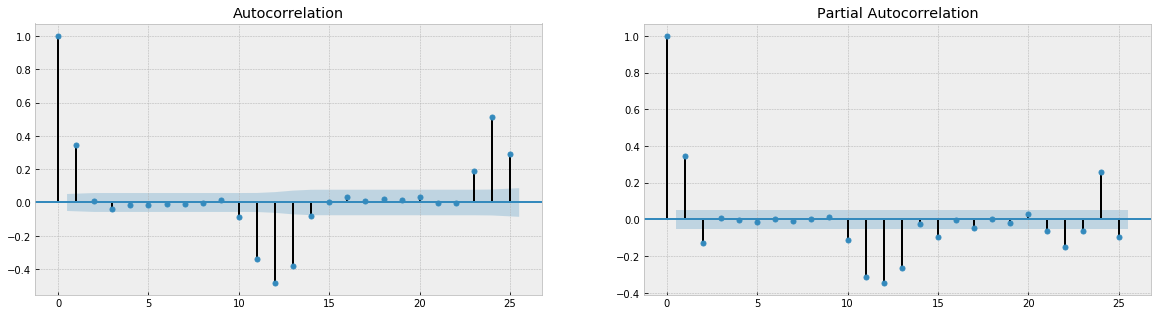

In [33]:
# ACF = q
# PACF = p
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig = sm.graphics.tsa.plot_acf(diffSeries5, lags=25, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(diffSeries5, lags=25, ax=ax[1])

In [34]:
p_5 = 1 # Наиболее отличен от нуля (Partial Autocorrelation)
q_5 = 2 # Наиболее отличен от нуля (Autocorrelation)
d_5 = 0

In [35]:
model5 = sm.tsa.ARIMA(sensor_5, order=(p_5,d_5,q_5)).fit(full_output=False, disp=0)
print(model5.summary())

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               sensor 5   No. Observations:                 1477
Model:                     ARMA(1, 2)   Log Likelihood               -5533.967
Method:                       css-mle   S.D. of innovations             10.248
Date:                Thu, 07 May 2020   AIC                          11077.933
Time:                        22:39:06   BIC                          11104.422
Sample:                             0   HQIC                         11087.809
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            702.4848      2.620    268.112      0.000     697.349     707.620
ar.L1.sensor 5     0.8398      0.017     49.574      0.000       0.807       0.873
ma.L1.sensor 5     0.4700      0.030

## Sensor 6

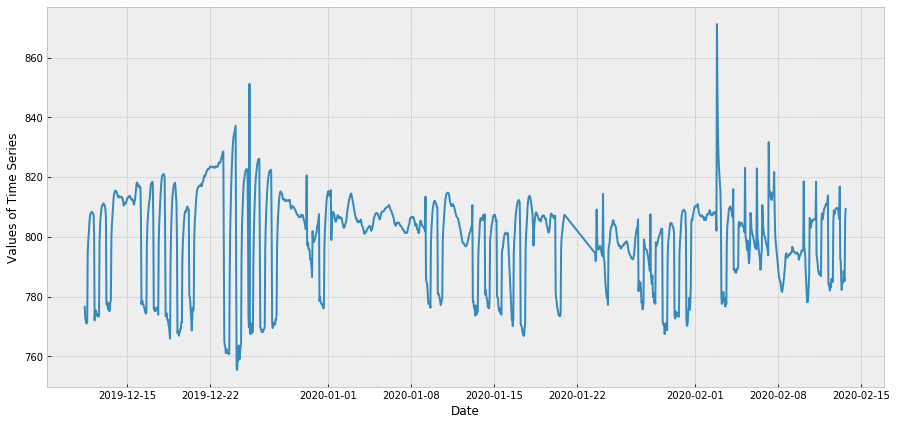

In [36]:
# Загрузка данных
sensor_6 = trainData['sensor 6']
# Отрисовка
base_plot(sensor_6)

### Parametr d

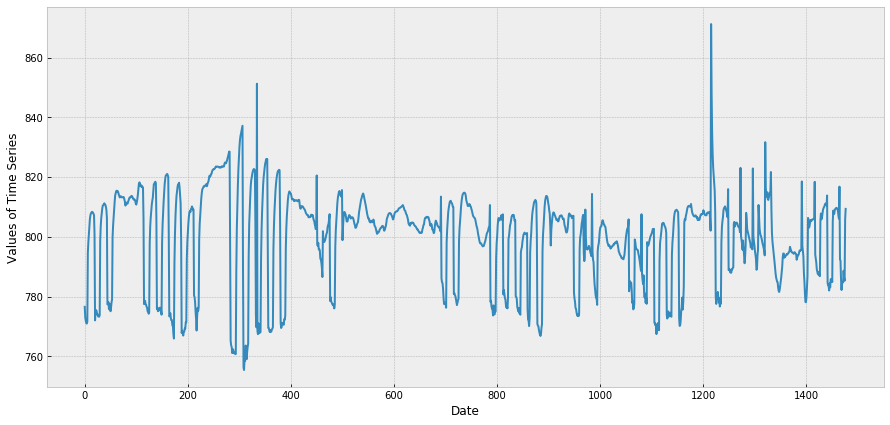

In [37]:
diffSeries6 = np.diff(sensor_6, 0)
x = np.arange(len(diffSeries6))
# Отрисовка
base_plot(diffSeries6, x)

In [38]:
sm.tsa.stattools.adfuller(diffSeries6)

(-5.032070774759167,
 1.9168270863636706e-05,
 24,
 1452,
 {'1%': -3.4348616379354793,
  '5%': -2.8635325860671696,
  '10%': -2.567830836482784},
 9429.63470250209)

### Finding p & q parametrs

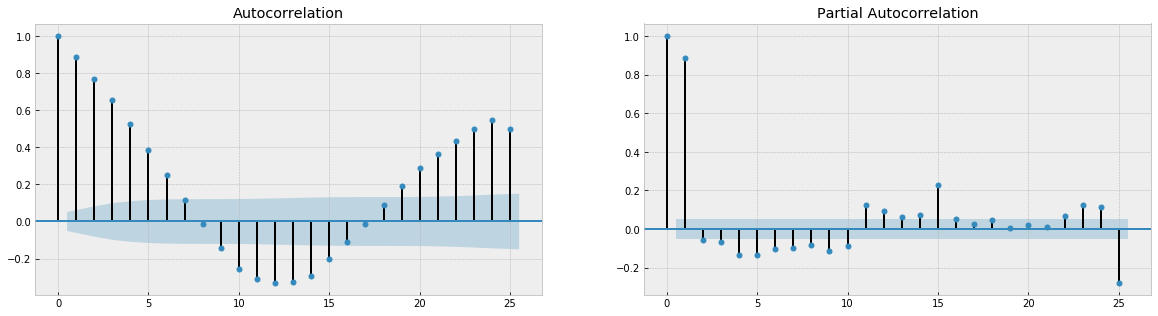

In [39]:
# ACF = q
# PACF = p
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig = sm.graphics.tsa.plot_acf(diffSeries6, lags=25, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(diffSeries6, lags=25, ax=ax[1])

In [40]:
p_6 = 1 # Наиболее отличен от нуля (Partial Autocorrelation)
q_6 = 1 # Наиболее отличен от нуля (Autocorrelation)
d_6 = 0

In [41]:
model6 = sm.tsa.ARIMA(sensor_6, order=(p_6, d_6, q_6)).fit(full_output=False, disp=0)
print(model6.summary())

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               sensor 6   No. Observations:                 1477
Model:                     ARMA(1, 1)   Log Likelihood               -4992.022
Method:                       css-mle   S.D. of innovations              7.102
Date:                Thu, 07 May 2020   AIC                           9992.045
Time:                        22:39:07   BIC                          10013.236
Sample:                             0   HQIC                          9999.945
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            799.6047      1.526    524.066      0.000     796.614     802.595
ar.L1.sensor 6     0.8730      0.014     61.583      0.000       0.845       0.901
ma.L1.sensor 6     0.0538      0.028

## Sensor 8

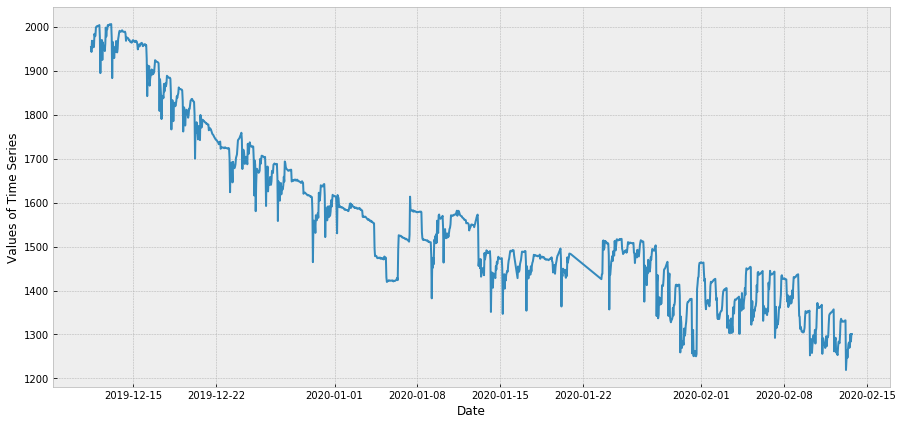

In [42]:
# Загрузка данных
sensor_8 = trainData['sensor 8']
# Отрисовка
base_plot(sensor_8)

### Parametr d

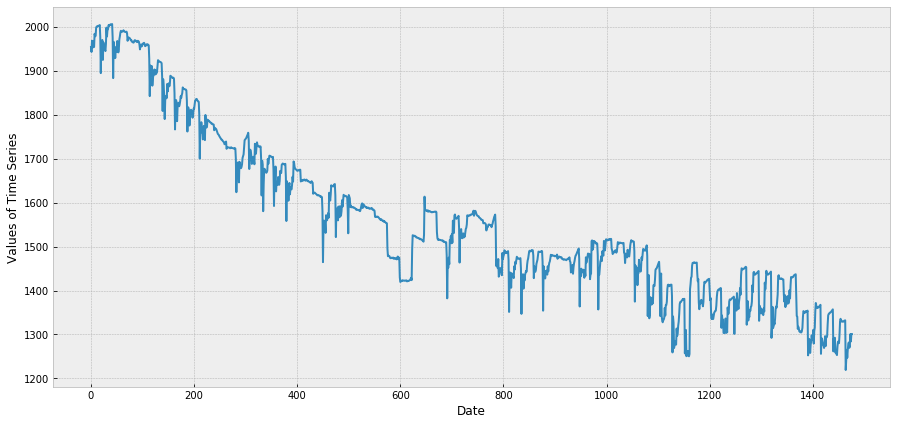

In [43]:
diffSeries8 = np.diff(sensor_8, 0)
x = np.arange(len(diffSeries8))
# Отрисовка
base_plot(diffSeries8, x)

In [44]:
sm.tsa.stattools.adfuller(diffSeries8)

(-1.8890537048577025,
 0.3372279855860677,
 24,
 1452,
 {'1%': -3.4348616379354793,
  '5%': -2.8635325860671696,
  '10%': -2.567830836482784},
 12925.731335620423)

### Finding p & q parametrs

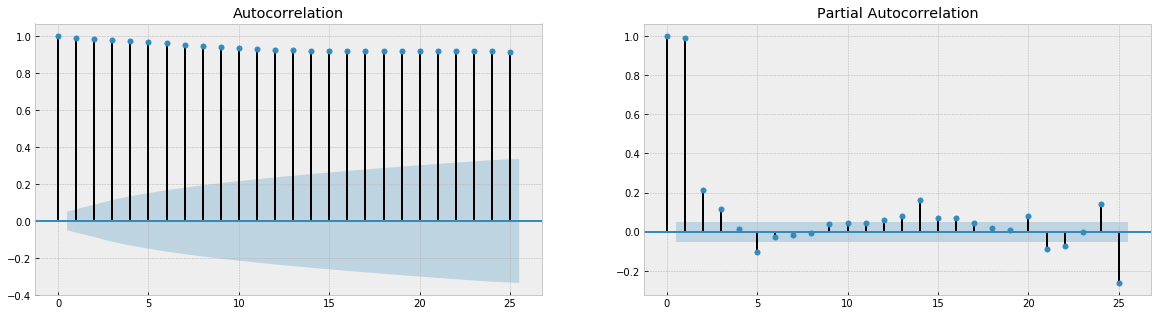

In [45]:
# ACF = q
# PACF = p
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig = sm.graphics.tsa.plot_acf(diffSeries8, lags=25, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(diffSeries8, lags=25, ax=ax[1])

In [46]:
p_8 = 1 # Наиболее отличен от нуля (Partial Autocorrelation)
q_8 = 1 # Наиболее отличен от нуля (Autocorrelation)
d_8 = 0

In [47]:
model8 = sm.tsa.ARIMA(sensor_8, order=(p_8, d_8, q_8)).fit(full_output=False, disp=0)
print(model8.summary())

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               sensor 8   No. Observations:                 1477
Model:                     ARMA(1, 1)   Log Likelihood               -6741.174
Method:                       css-mle   S.D. of innovations             23.187
Date:                Thu, 07 May 2020   AIC                          13490.349
Time:                        22:39:09   BIC                          13511.540
Sample:                             0   HQIC                         13498.250
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1583.0501    134.966     11.729      0.000    1318.521    1847.579
ar.L1.sensor 8     0.9975      0.002    527.193      0.000       0.994       1.001
ma.L1.sensor 8    -0.3081      0.025

## Sensor 9

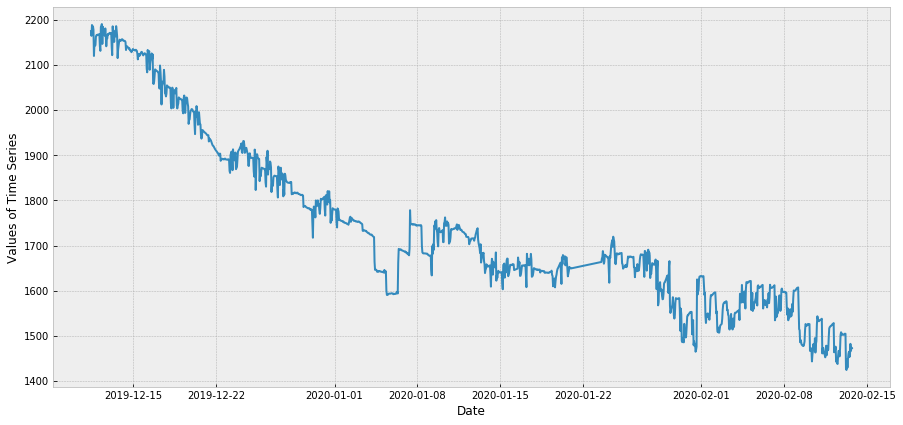

In [48]:
# Загрузка данных
sensor_9 = trainData['sensor 9']
# Отрисовка
base_plot(sensor_9)

### Parametr d

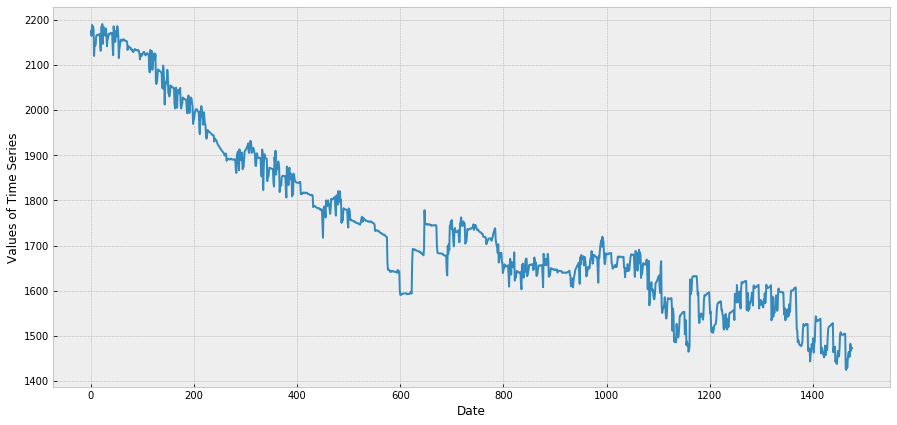

In [49]:
diffSeries9 = np.diff(sensor_9, 0)
x = np.arange(len(diffSeries9))
# Отрисовка
base_plot(diffSeries9, x)

In [50]:
sm.tsa.stattools.adfuller(diffSeries9)

(-2.0238987079117328,
 0.2761936430776774,
 24,
 1452,
 {'1%': -3.4348616379354793,
  '5%': -2.8635325860671696,
  '10%': -2.567830836482784},
 12008.39198398045)

### Finding p & q parametrs

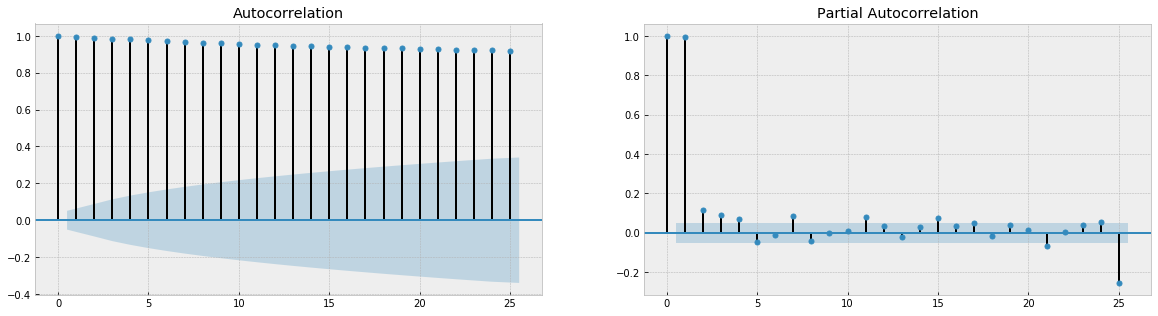

In [51]:
# ACF = q
# PACF = p
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig = sm.graphics.tsa.plot_acf(diffSeries9, lags=25, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(diffSeries9, lags=25, ax=ax[1])

In [52]:
p_9 = 1 # Наиболее отличен от нуля (Partial Autocorrelation)
q_9 = 1 # Наиболее отличен от нуля (Autocorrelation)
d_9 = 0

In [53]:
model9 = sm.tsa.ARIMA(sensor_9, order=(p_9,d_9,q_9)).fit(full_output=False, disp=0)
print(model9.summary())

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               sensor 9   No. Observations:                 1477
Model:                     ARMA(1, 1)   Log Likelihood               -6249.695
Method:                       css-mle   S.D. of innovations             16.619
Date:                Thu, 07 May 2020   AIC                          12507.390
Time:                        22:39:11   BIC                          12528.582
Sample:                             0   HQIC                         12515.291
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1782.6544    193.518      9.212      0.000    1403.365    2161.943
ar.L1.sensor 9     0.9988      0.001    833.475      0.000       0.996       1.001
ma.L1.sensor 9    -0.2394      0.031

# Predictions

In [54]:
def check_resid(model):
    q_test = sm.tsa.stattools.acf(model.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
    print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))
    
def get_predict_plot(model, sensor, sensor_name):
    predict = model.predict(start=trainData.shape[0], end=trainData.shape[0]+24*10, dynamic=True)[1:]
    true = testingData[sensor_name]
    
    # Compute metrics
    r2 = r2_score(true.values, predict)
    mse = mean_squared_error(true.values, predict)
    
    print('R^2: %1.2f' % r2)
    print('MSE: %1.2f' % mse )
    
    # Plotting
    plt.figure(figsize=(14,5))
    plt.plot(sensor, label='Actual Train')
    plt.plot(testingData.index, predict, label='Prediction')
    plt.plot(true, label='Actual Test')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Values of Time Series')
    plt.axvspan(testingData.index[0], testingData.index[-1], alpha=0.2, color='red')
    plt.grid(True)

## Sensor 1

In [55]:
check_resid(model1)

       Q-stat   p-value
0    0.000547  0.981343
1    0.052703  0.973993
2    2.916547  0.404672
3    2.919648  0.571361
4    4.715592  0.451566
5   10.673371  0.099011
6   11.184773  0.130760
7   11.196220  0.190827
8   12.153244  0.204807
9   12.182918  0.273001
10  12.327691  0.339523
11  14.834900  0.250590
12  14.838723  0.317529
13  15.650527  0.335179
14  16.331457  0.360371
15  17.311914  0.365696
16  17.321892  0.432772
17  18.475406  0.424772
18  19.661270  0.415214
19  21.299508  0.379696
20  21.348572  0.437841
21  21.674083  0.479480
22  21.770295  0.534153
23  21.913647  0.584421
24  22.394191  0.612893
25  23.170741  0.623271
26  23.269989  0.670426
27  23.964530  0.683407
28  25.321009  0.661488
29  25.776277  0.686500
30  26.655307  0.689372
31  28.703982  0.634154
32  29.122496  0.660699
33  30.492920  0.640276
34  30.551407  0.682752
35  31.610755  0.677400
36  31.731282  0.714193
37  31.986524  0.742908
38  31.990946  0.779380
39  32.263269  0.802935


D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


R^2: -0.04
MSE: 38129.84


D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


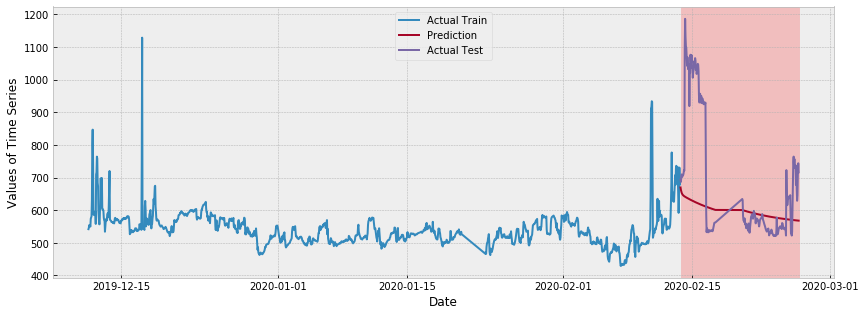

In [56]:
get_predict_plot(model = model1, sensor = sensor_1, sensor_name = 'sensor 1')

## Sensor 2

In [57]:
check_resid(model2)

        Q-stat        p-value
0     0.007431   9.313042e-01
1     0.014652   9.927006e-01
2     2.325488   5.076556e-01
3     4.905218   2.971617e-01
4     5.858472   3.202347e-01
5     6.157312   4.058008e-01
6     6.381120   4.960178e-01
7     6.453270   5.965955e-01
8     7.879933   5.462900e-01
9    13.399725   2.021733e-01
10   86.209540   9.183069e-14
11  174.498790   5.728183e-31
12  281.967036   1.412525e-52
13  283.910223   2.653803e-52
14  285.099481   6.921525e-52
15  285.386464   2.686535e-51
16  285.407872   1.145024e-50
17  287.914790   1.462498e-50
18  289.134938   3.351604e-50
19  290.938584   5.704241e-50
20  292.542292   1.044398e-49
21  292.783954   3.537371e-49
22  292.794061   1.303826e-48
23  599.352121  3.239976e-111
24  630.074522  6.195699e-117
25  630.172529  3.001909e-116
26  630.885091  1.061485e-115
27  631.272466  4.308035e-115
28  631.273670  2.066097e-114
29  631.274751  9.734106e-114
30  631.280195  4.498346e-113
31  631.349118  1.983565e-112
32  631.45

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


R^2: 0.00
MSE: 79.94


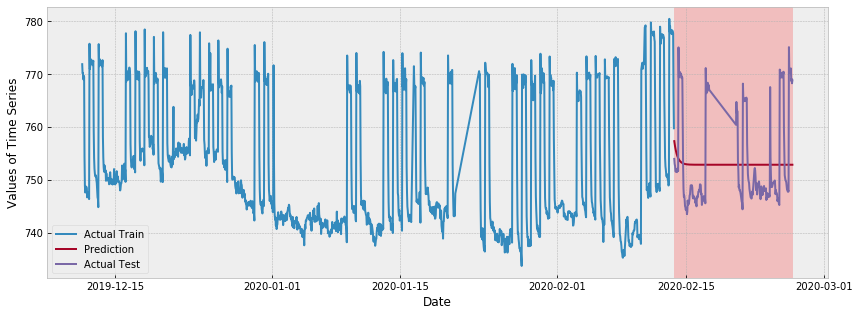

In [58]:
get_predict_plot(model = model2, sensor = sensor_2, sensor_name = 'sensor 2')

## Sensor 3

In [59]:
check_resid(model3)

        Q-stat        p-value
0     0.017896   8.935803e-01
1     0.018448   9.908183e-01
2     2.139536   5.439558e-01
3     3.601867   4.625592e-01
4     3.937832   5.584010e-01
5     4.107100   6.621854e-01
6     5.578061   5.897856e-01
7     5.745495   6.757156e-01
8     9.655087   3.791224e-01
9    15.830645   1.045841e-01
10   93.029932   4.238910e-15
11   93.515973   1.026352e-14
12  192.465177   4.797838e-34
13  200.787527   3.792520e-35
14  203.174385   4.808115e-35
15  205.838628   5.224264e-35
16  206.044387   1.738978e-34
17  210.547438   7.712751e-35
18  213.379759   7.299456e-35
19  213.578745   2.274001e-34
20  213.626817   7.398802e-34
21  214.095190   1.940741e-33
22  217.385362   1.391889e-33
23  712.381163  6.156453e-135
24  718.877729  1.462951e-135
25  718.922193  7.766366e-135
26  719.964566  2.496692e-134
27  720.506140  1.003724e-133
28  720.521024  5.107914e-133
29  720.805299  2.243354e-132
30  720.881607  1.070495e-131
31  722.498857  2.400704e-131
32  725.01

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


R^2: -0.75
MSE: 65.85


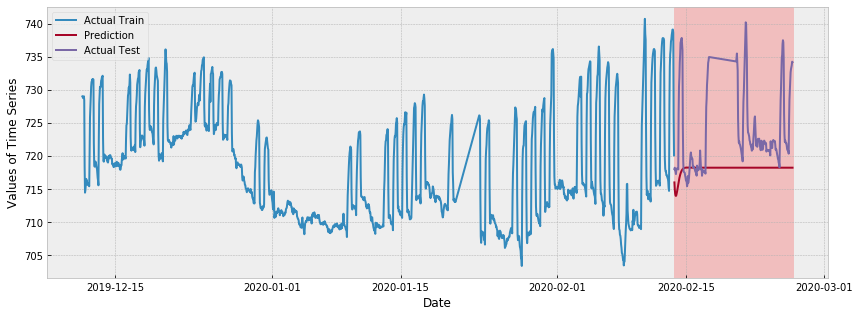

In [60]:
get_predict_plot(model = model3, sensor = sensor_3, sensor_name = 'sensor 3')

## Sensor 4

In [61]:
check_resid(model4)

         Q-stat        p-value
0      0.029264   8.641715e-01
1      0.057097   9.718550e-01
2      7.333809   6.198594e-02
3      7.604238   1.071997e-01
4     10.783206   5.585189e-02
5     10.916826   9.098130e-02
6     11.052053   1.363645e-01
7     11.161154   1.927342e-01
8     11.161232   2.648191e-01
9     12.219438   2.706388e-01
10    16.383087   1.274942e-01
11   401.226797   2.080806e-78
12   427.908279   2.816423e-83
13   431.394510   3.032499e-83
14   431.937868   1.319782e-82
15   432.010339   6.969531e-82
16   432.193593   3.375116e-81
17   432.575964   1.439960e-80
18   435.326296   1.913686e-80
19   437.484098   3.306141e-80
20   438.568620   9.341383e-80
21   438.573677   4.319874e-79
22   438.715814   1.827486e-78
23   859.707809  4.936582e-166
24   865.997825  1.399582e-166
25   866.108232  7.894619e-166
26   867.051771  2.912930e-165
27   867.059926  1.661453e-164
28   867.640983  7.048054e-164
29   868.888386  2.128842e-163
30   868.922585  1.137679e-162
31   869

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


R^2: -0.20
MSE: 310.90


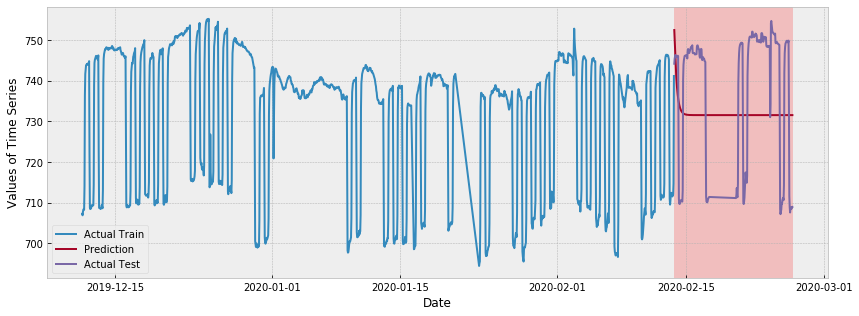

In [62]:
get_predict_plot(model = model4, sensor = sensor_4, sensor_name = 'sensor 4')

## Sensor 5

In [63]:
check_resid(model5)

        Q-stat        p-value
0     0.012817   9.098612e-01
1     0.479295   7.869053e-01
2     3.600174   3.080004e-01
3     5.633539   2.282382e-01
4     6.268216   2.809883e-01
5     6.527923   3.667154e-01
6     6.549917   4.771944e-01
7     6.745167   5.643603e-01
8     7.161867   6.202710e-01
9     7.268527   6.998744e-01
10   64.524488   1.323892e-09
11  183.206565   9.368452e-33
12  277.926105   9.845693e-52
13  278.919345   2.895660e-51
14  279.991019   7.921785e-51
15  280.712645   2.478946e-50
16  281.016487   9.167623e-50
17  282.182408   2.190308e-49
18  282.586383   7.299673e-49
19  286.120370   5.465905e-49
20  287.232532   1.249806e-48
21  287.336592   4.472923e-48
22  289.365946   6.401931e-48
23  578.898409  6.119461e-107
24  607.108756  3.928432e-112
25  607.226996  1.850554e-111
26  607.460406  8.087288e-111
27  609.377760  1.548914e-110
28  609.598591  6.571655e-110
29  609.598599  3.044265e-109
30  609.983510  1.153947e-108
31  609.992543  5.146900e-108
32  610.03

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


R^2: -0.15
MSE: 783.86


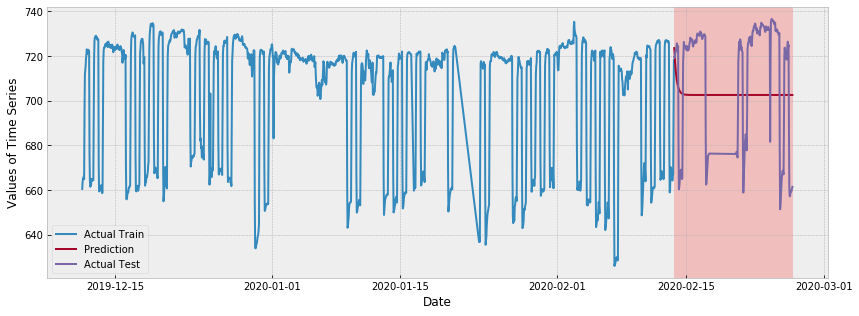

In [64]:
get_predict_plot(model = model5, sensor = sensor_5, sensor_name = 'sensor 5')

## Sensor 6

In [65]:
check_resid(model6)

        Q-stat        p-value
0     0.017594   8.944766e-01
1     4.441091   1.085499e-01
2    17.700328   5.070889e-04
3    25.027399   4.967565e-05
4    25.786984   9.813710e-05
5    25.923628   2.300550e-04
6    26.635532   3.875450e-04
7    26.738313   7.844132e-04
8    30.152199   4.133105e-04
9   109.071527   8.210379e-19
10  143.468776   3.204680e-25
11  163.249027   1.142718e-28
12  183.608151   3.111972e-32
13  266.983182   8.720556e-49
14  267.717512   2.744093e-48
15  267.815188   1.129818e-47
16  269.328435   2.306535e-47
17  269.891828   7.174977e-47
18  271.111282   1.596682e-46
19  281.030235   5.933751e-48
20  286.702801   1.600708e-48
21  288.651738   2.424923e-48
22  297.167387   1.708780e-49
23  559.179768  8.009447e-103
24  593.939307  2.211947e-109
25  594.668797  7.686769e-109
26  595.331800  2.706370e-108
27  601.073782  8.241648e-109
28  601.074347  3.858438e-108
29  601.270690  1.616283e-107
30  603.494879  2.535481e-107
31  603.566286  1.092028e-106
32  603.61

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


R^2: -0.15
MSE: 282.62


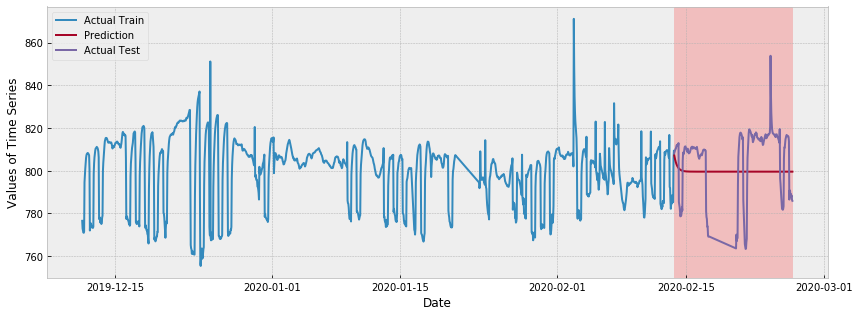

In [66]:
get_predict_plot(model = model6, sensor = sensor_6, sensor_name = 'sensor 6')

## Sensor 8

In [67]:
check_resid(model8)

        Q-stat       p-value
0     0.054011  8.162258e-01
1     4.133850  1.265744e-01
2     6.930638  7.414176e-02
3    23.119234  1.198667e-04
4    23.120231  3.201598e-04
5    23.228406  7.234795e-04
6    23.528582  1.378295e-03
7    28.640836  3.665526e-04
8    35.554887  4.754283e-05
9    41.339626  9.824085e-06
10   56.497559  4.116778e-08
11   81.553633  2.084276e-12
12  108.615461  3.486471e-17
13  112.127179  2.161769e-17
14  118.425627  3.822049e-18
15  122.559854  1.765841e-18
16  123.725606  2.998638e-18
17  123.755493  8.176528e-18
18  125.985232  8.351476e-18
19  152.453528  2.128483e-22
20  159.990609  2.174488e-23
21  160.136360  5.737869e-23
22  160.294325  1.471988e-22
23  353.381178  2.571507e-60
24  371.080429  2.508119e-63
25  371.714347  7.275897e-63
26  373.123209  1.443482e-62
27  384.471777  2.746744e-64
28  384.946254  8.258732e-64
29  385.009911  2.954892e-63
30  385.926553  7.004728e-63
31  388.922265  6.269868e-63
32  392.968339  3.426916e-63
33  398.856889

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


R^2: -0.45
MSE: 37251.12


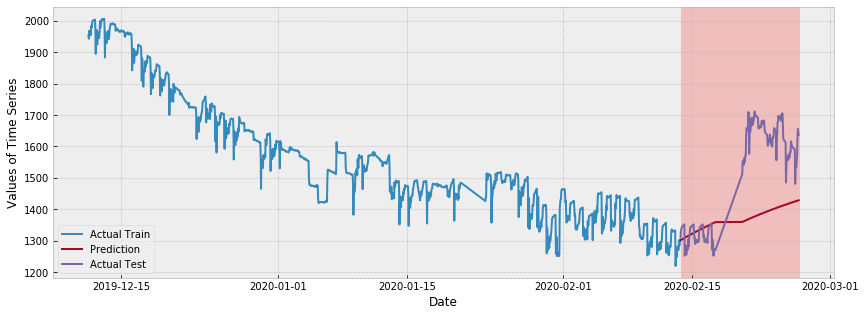

In [68]:
get_predict_plot(model = model8, sensor = sensor_8, sensor_name = 'sensor 8')

## Sensor 9

In [69]:
check_resid(model9)

        Q-stat       p-value
0     0.560415  4.540931e-01
1    13.061855  1.457653e-03
2    17.503645  5.566782e-04
3    21.015430  3.144462e-04
4    21.088966  7.792991e-04
5    30.689288  2.905691e-05
6    32.120675  3.857610e-05
7    32.128002  8.835048e-05
8    35.226139  5.435122e-05
9    51.311616  1.529755e-07
10   52.713628  2.023755e-07
11   55.515796  1.462555e-07
12   55.684568  3.063189e-07
13   66.970279  6.791304e-09
14   68.935087  6.908896e-09
15   69.321280  1.311690e-08
16   70.035178  2.126890e-08
17   72.732481  1.550052e-08
18   72.868155  3.048820e-08
19   82.171642  1.674880e-09
20   82.228838  3.413025e-09
21   85.186376  2.228861e-09
22   85.195743  4.485936e-09
23  215.137375  1.194677e-32
24  219.469289  5.225791e-33
25  223.370410  2.755464e-33
26  225.757932  2.833091e-33
27  226.116519  7.088745e-33
28  226.697079  1.581254e-32
29  227.986966  2.543814e-32
30  228.000703  7.063837e-32
31  228.000710  1.940834e-31
32  228.483777  4.257493e-31
33  238.626743

D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


D:\Soft\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


R^2: -0.98
MSE: 47949.56


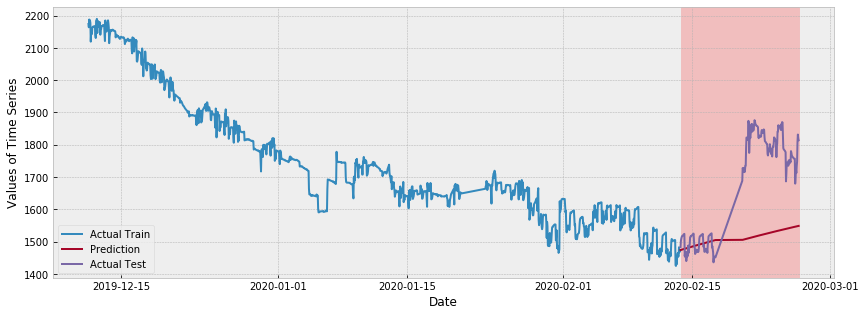

In [70]:
get_predict_plot(model = model9, sensor = sensor_9, sensor_name = 'sensor 9')